<a href="https://colab.research.google.com/github/JoannaGrunwald/data-science-bootcamp/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PANDAS

In [ ]:
import pandas as pd
pd.__version__

'1.3.5'

Podstawowe struktury danych: pd.Series

In [ ]:
# w odróżnieniu od array mamy przypisany indeks 
s = pd.Series(data = [3,2,-1, 6])
s

0    3
1    2
2   -1
3    6
dtype: int64

In [ ]:
s = pd.Series(data = [3,2,-1, 6], index = ['a','b','c','d'], name = 'sample')
s

a    3
b    2
c   -1
d    6
Name: sample, dtype: int64

In [ ]:
s = pd.Series(data = [3.,2,-1, 6], index = ['a','b','c','d'], name = 'sample')
s

a    3.0
b    2.0
c   -1.0
d    6.0
Name: sample, dtype: float64

In [ ]:
import numpy as np

s = pd.Series(data = [3.,np.nan,-1, 6], index = ['a','b','c','d'], name = 'sample')
s

a    3.0
b    NaN
c   -1.0
d    6.0
Name: sample, dtype: float64

In [ ]:
s = pd.Series(data = [True, False, True])
s


0     True
1    False
2     True
dtype: bool

In [ ]:
s = pd.Series(data = np.arange(10, 20), index=pd.date_range(start = '20200101', periods = 10, freq = 'M'))
s

2020-01-31    10
2020-02-29    11
2020-03-31    12
2020-04-30    13
2020-05-31    14
2020-06-30    15
2020-07-31    16
2020-08-31    17
2020-09-30    18
2020-10-31    19
Freq: M, dtype: int64

In [ ]:
list(s.index)

[Timestamp('2020-01-31 00:00:00', freq='M'),
 Timestamp('2020-02-29 00:00:00', freq='M'),
 Timestamp('2020-03-31 00:00:00', freq='M'),
 Timestamp('2020-04-30 00:00:00', freq='M'),
 Timestamp('2020-05-31 00:00:00', freq='M'),
 Timestamp('2020-06-30 00:00:00', freq='M'),
 Timestamp('2020-07-31 00:00:00', freq='M'),
 Timestamp('2020-08-31 00:00:00', freq='M'),
 Timestamp('2020-09-30 00:00:00', freq='M'),
 Timestamp('2020-10-31 00:00:00', freq='M')]

In [ ]:
s = pd.Series(data = ['python', 'java', 'sql'], name = 'languages')
s

0    python
1      java
2       sql
Name: languages, dtype: object

In [ ]:
type(s)

pandas.core.series.Series

In [ ]:
s.index

RangeIndex(start=0, stop=3, step=1)

In [ ]:
s.values

array(['python', 'java', 'sql'], dtype=object)

In [ ]:
s.dtype

dtype('O')

In [ ]:
s.shape

(3,)

In [ ]:
price = pd.Series(data = {'Apple':200, 'CD Project':60, 'Amazon':1900, 'KGHM':np.nan}) # dictionary
price

Apple          200.0
CD Project      60.0
Amazon        1900.0
KGHM             NaN
dtype: float64

In [ ]:
price['CD Project']

60

In [ ]:
price[1]

60

In [ ]:
price.count()

3

In [ ]:
price.value_counts()

200.0     1
60.0      1
1900.0    1
dtype: int64

In [ ]:
price.value_counts(dropna = False)

200.0     1
60.0      1
1900.0    1
NaN       1
dtype: int64

In [ ]:
price.sum()

2160.0

In [ ]:
price.min()

60

In [ ]:
price.describe()

count       3.000000
mean      720.000000
std      1024.304642
min        60.000000
25%       130.000000
50%       200.000000
75%      1050.000000
max      1900.000000
dtype: float64

In [ ]:
price.nlargest()

Amazon        1900.0
Apple          200.0
CD Project      60.0
dtype: float64

In [ ]:
price.nsmallest(1)

CD Project    60.0
dtype: float64

In [ ]:
price.rank()

Apple         2.0
CD Project    1.0
Amazon        3.0
KGHM          NaN
dtype: float64

In [ ]:
price.sort_values() #ascending = False

CD Project      60.0
Apple          200.0
Amazon        1900.0
KGHM             NaN
dtype: float64

In [ ]:
price_pln = price.apply(lambda x: x * 3.8)

In [ ]:
price_pln

Apple          760.0
CD Project     228.0
Amazon        7220.0
KGHM             NaN
dtype: float64

Podstawowe struktury danych: pd.DataFrame

In [ ]:
df = pd.DataFrame(data = [12,12,32], index = ['first', 'second', 'third'], columns = ['col1'])
df

,col1
first,12
second,12
third,32


In [ ]:
df = pd.DataFrame(data = {'WIG20':['PKN_Orlen', 'PKO BP'],
                          'mWIG40':['Amica', 'Playway']})
df

,WIG20,mWIG40
0,PKN_Orlen,Amica
1,PKO BP,Playway


In [ ]:
df = pd.DataFrame(data = [[10,12,2], [23,12,4]], index = ['first', 'second'], columns = ['col1', 'col2', 'col3'])
df

,col1,col2,col3
first,10,12,2
second,23,12,4


In [ ]:
df.columns

Index(['col1', 'col2', 'col3'], dtype='object')

In [ ]:
df.index

Index(['first', 'second'], dtype='object')

In [ ]:
df.values

array([[10, 12,  2],
       [23, 12,  4]])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, first to second
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   col1    2 non-null      int64
 1   col2    2 non-null      int64
 2   col3    2 non-null      int64
dtypes: int64(3)
memory usage: 172.0+ bytes


In [ ]:
df.describe()

,col1,col2,col3
count,2.000000,2.0,2.000000
mean,16.500000,12.0,3.000000
std,9.192388,0.0,1.414214
min,10.000000,12.0,2.000000
25%,13.250000,12.0,2.500000
50%,16.500000,12.0,3.000000
75%,19.750000,12.0,3.500000
max,23.000000,12.0,4.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2.0,16.5,9.192388,10.0,13.25,16.5,19.75,23.0
col2,2.0,12.0,0.000000,12.0,12.00,12.0,12.00,12.0
col3,2.0,3.0,1.414214,2.0,2.50,3.0,3.50,4.0


Selekcja kolumn

In [ ]:
df

,col1,col2,col3
first,10,12,2
second,23,12,4


In [ ]:
df['col1']

first     10
second    23
Name: col1, dtype: int64

In [ ]:
type(df['col2'])  

pandas.core.series.Series

In [ ]:
df[['col2']]

,col2
first,12
second,12


In [ ]:
type(df[['col2']])

pandas.core.frame.DataFrame

In [ ]:
df.columns = ['a', 'b', 'c'] #zmiana nazwy kolumn
df

,a,b,c
first,10,12,2
second,23,12,4


In [ ]:
df.a #szybszy wybór kolumny, ale nie zawsze praktyczny np. przy spacji w nazwie

first     10
second    23
Name: a, dtype: int64

In [ ]:
df.loc['first'] # po nazwach

a    10
b    12
c     2
Name: first, dtype: int64

In [ ]:
df.iloc[0] # po indeksach

a    10
b    12
c     2
Name: first, dtype: int64

In [ ]:
df.loc['first', 'b']

12

Praca z danymi

Import bibliotek

In [2]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.21.6
Pandas: 1.3.5


Załadowanie danych

In [10]:
def fetch_financial_data(company = 'AMZN'):
  """Pobiera dane dotyczące notowań spółek na giełdzie 
  według symboli na serwisie stooq.pl"""
  import pandas_datareader.data as web
  return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2023-02-07 to 2018-02-09
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-02-06,102.9250,103.9484,100.6500,102.1800,81945199
2023-02-03,105.2600,108.7800,102.5200,103.3900,144374828
2023-02-02,110.2450,114.0000,108.8800,112.9100,158154243
2023-02-01,102.5300,106.2400,101.2400,105.1500,80450121
2023-01-31,101.1550,103.3484,101.1400,103.1300,66527253
...,...,...,...,...,...
2018-02-14,70.3125,72.6030,70.1680,72.5525,119040740
2018-02-13,69.2965,70.9860,69.1765,70.7255,117654340
2018-02-12,68.2335,69.6905,67.2005,69.3665,134481180


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
df.columns = [col.lower() for col in df.columns]
df.head()

,open,high,low,close,volume
Date,,,,,
2023-02-06,102.925,103.9484,100.65,102.18,81945199
2023-02-03,105.260,108.7800,102.52,103.39,144374828
2023-02-02,110.245,114.0000,108.88,112.91,158154243
2023-02-01,102.530,106.2400,101.24,105.15,80450121
2023-01-31,101.155,103.3484,101.14,103.13,66527253


In [ ]:
df.describe()

,open,high,low,close,volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,120.534269,121.996602,118.914278,120.464661,8.600951e+07
std,35.005556,35.373996,34.589388,34.939259,3.997418e+07
min,67.300000,69.174500,63.296500,66.980000,1.762674e+07
25%,89.470000,90.148500,88.400000,89.430500,5.897420e+07
50%,108.110000,110.990000,106.372000,108.444000,7.496474e+07
75%,158.338000,159.938000,156.250000,158.100000,1.015493e+08
max,187.200000,188.654000,184.840000,186.570000,3.113457e+08


Selekcja kolumn

In [ ]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2023-02-06,102.925,103.9484,100.65,102.18,81945199
2023-02-03,105.260,108.7800,102.52,103.39,144374828
2023-02-02,110.245,114.0000,108.88,112.91,158154243
2023-02-01,102.530,106.2400,101.24,105.15,80450121
2023-01-31,101.155,103.3484,101.14,103.13,66527253
2023-01-30,101.090,101.7400,99.01,100.55,70691860
2023-01-27,99.530,103.4850,99.53,102.24,87775614
2023-01-26,98.235,99.4900,96.92,99.22,68523557
2023-01-25,92.560,97.2400,91.52,97.18,94261570


In [ ]:
df['open'] # Series

Date
2023-02-06    102.925
2023-02-03    105.260
2023-02-02    110.245
2023-02-01    102.530
2023-01-31    101.155
2023-01-30    101.090
2023-01-27     99.530
2023-01-26     98.235
2023-01-25     92.560
2023-01-24     96.930
Name: open, dtype: float64

In [ ]:
df.open

Date
2023-02-06    102.925
2023-02-03    105.260
2023-02-02    110.245
2023-02-01    102.530
2023-01-31    101.155
2023-01-30    101.090
2023-01-27     99.530
2023-01-26     98.235
2023-01-25     92.560
2023-01-24     96.930
Name: open, dtype: float64

In [ ]:
df[['open']] # Data Frame

,open
Date,
2023-02-06,102.925
2023-02-03,105.260
2023-02-02,110.245
2023-02-01,102.530
2023-01-31,101.155
2023-01-30,101.090
2023-01-27,99.530
2023-01-26,98.235
2023-01-25,92.560


In [ ]:
df[['open', 'close']]

,open,close
Date,,
2023-02-06,102.925,102.18
2023-02-03,105.260,103.39
2023-02-02,110.245,112.91
2023-02-01,102.530,105.15
2023-01-31,101.155,103.13
2023-01-30,101.090,100.55
2023-01-27,99.530,102.24
2023-01-26,98.235,99.22
2023-01-25,92.560,97.18


In [ ]:
df.iloc[:, [0,3]]

,open,close
Date,,
2023-02-06,102.925,102.18
2023-02-03,105.260,103.39
2023-02-02,110.245,112.91
2023-02-01,102.530,105.15
2023-01-31,101.155,103.13
2023-01-30,101.090,100.55
2023-01-27,99.530,102.24
2023-01-26,98.235,99.22
2023-01-25,92.560,97.18


In [ ]:
df.iloc[:, [-1]] # ostatnia kolumna

,volume
Date,
2023-02-06,81945199
2023-02-03,144374828
2023-02-02,158154243
2023-02-01,80450121
2023-01-31,66527253
2023-01-30,70691860
2023-01-27,87775614
2023-01-26,68523557
2023-01-25,94261570


In [ ]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 943 entries, 2023-02-06 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    943 non-null    float64
 1   High    943 non-null    float64
 2   Low     943 non-null    float64
 3   Close   943 non-null    float64
 4   Volume  943 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 44.2 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,943.000000,943.000000,943.000000,943.000000,9.430000e+02
mean,37.256849,38.026511,36.418986,37.222089,2.542331e+07
std,9.822117,9.895173,9.666544,9.759661,1.642615e+07
min,15.960000,17.800000,13.710000,14.820000,3.380003e+06
25%,29.710000,30.405000,29.120000,29.745000,1.569242e+07
50%,34.780000,35.340000,33.940000,34.680000,2.176605e+07
75%,44.195000,44.912500,43.390000,44.000000,3.054226e+07
max,63.250000,64.050000,60.800000,63.180000,1.863225e+08


In [ ]:
df.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
2023-02-06,33.53,34.21,32.90,33.90,33594934
2023-02-03,32.17,33.95,32.15,33.09,25804879
2023-02-02,32.42,33.47,32.42,33.05,32045470
2023-02-01,30.88,31.85,30.64,31.49,21206352
2023-01-31,29.75,30.96,29.74,30.93,15611532


In [ ]:
df['Average'] = (df.Open + df.Close)/2
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2023-02-06,33.53,34.21,32.90,33.90,33594934,33.715
2023-02-03,32.17,33.95,32.15,33.09,25804879,32.630
2023-02-02,32.42,33.47,32.42,33.05,32045470,32.735
2023-02-01,30.88,31.85,30.64,31.49,21206352,31.185
2023-01-31,29.75,30.96,29.74,30.93,15611532,30.340


In [ ]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240


In [ ]:
df[['Close']].shift(1) # przesunięcie o jeden w dół

,Close
Date,
2019-05-10,NaN
2019-05-13,41.57
2019-05-14,37.10
2019-05-15,39.96
2019-05-16,41.29
...,...
2023-01-31,29.63
2023-02-01,30.93
2023-02-02,31.49


In [ ]:
df['Close_shift'] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29


In [ ]:
df['Daily_change'] = df.Close / df.Close_shift - 1 # stopa procentowa
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414


In [ ]:
df['Daily change'] = df.Close / df.Close_shift - 1 
del df['Daily change'] # usuwanie dodanej kolumny

In [ ]:
df.Daily_change.min()
df.Daily_change.max()

0.3825910931174088

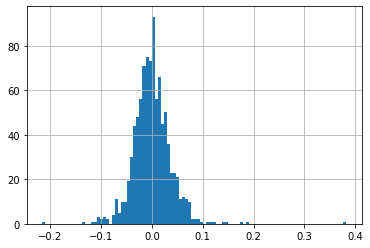

In [ ]:
df.Daily_change.hist(bins = 100)

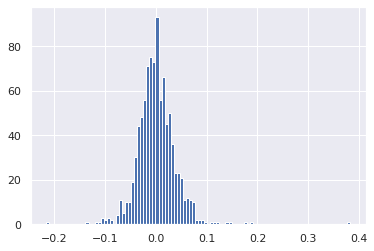

In [ ]:
import seaborn as sns
sns.set()
df.Daily_change.hist(bins = 100)

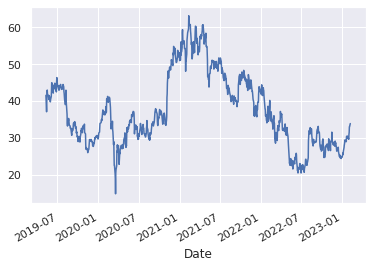

In [ ]:
df.Close.plot()

Filtrowanie danych

In [ ]:
# zostawiamy tylko wiersze z dodatnią stopą zwrotu
df_positive = df[df.Daily_change > 0]
df_positive.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2019-05-31,41.15,41.57,39.41,40.41,23209848,40.780,39.80,0.015327


In [ ]:
df_positive.Daily_change.mean()

0.02794134092939793

In [ ]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-24,41.28,41.51,40.50,41.51,8786751,41.395,40.47,0.025698
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,31.04,0.004832
2020-12-04,52.71,54.86,52.71,54.86,22207887,53.785,52.52,0.044554
2021-02-04,56.45,57.85,56.11,57.85,13847255,57.150,57.12,0.012780
2022-11-30,27.80,29.14,27.64,29.14,18177028,28.470,27.76,0.049712


In [ ]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-08-12,39.84,39.95,37.00,37.00,20632310,38.420,40.05,-0.076155
2019-12-09,27.96,28.36,27.68,27.68,21098387,27.820,27.86,-0.006461
2019-12-27,30.80,31.06,30.17,30.17,18465965,30.485,30.67,-0.016303
2020-12-31,53.28,53.28,51.00,51.00,13282786,52.140,53.15,-0.040452
2021-12-31,42.53,43.12,41.93,41.93,13746893,42.230,42.66,-0.017112
2023-01-05,25.73,26.01,25.55,25.55,9942038,25.640,25.91,-0.013894


In [ ]:
df[df.index > '2020-11-01']

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2020-11-02,34.15,35.05,34.06,34.81,18350453,34.480,33.41,0.041904
2020-11-03,35.27,36.15,35.15,35.77,16208783,35.520,34.81,0.027578
2020-11-04,40.66,42.15,39.00,40.99,101818168,40.825,35.77,0.145932
2020-11-05,40.33,42.05,40.01,41.96,34177623,41.145,40.99,0.023664
2020-11-06,42.09,45.38,41.62,44.87,57670672,43.480,41.96,0.069352
...,...,...,...,...,...,...,...,...
2023-01-31,29.75,30.96,29.74,30.93,15611532,30.340,29.63,0.043874
2023-02-01,30.88,31.85,30.64,31.49,21206352,31.185,30.93,0.018105
2023-02-02,32.42,33.47,32.42,33.05,32045470,32.735,31.49,0.049540


In [ ]:
df[(df.index >= '2020-11-01') & (df.index < '2020-11-15')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2020-11-02,34.15,35.05,34.060,34.81,18350453,34.480,33.41,0.041904
2020-11-03,35.27,36.15,35.150,35.77,16208783,35.520,34.81,0.027578
2020-11-04,40.66,42.15,39.000,40.99,101818168,40.825,35.77,0.145932
2020-11-05,40.33,42.05,40.010,41.96,34177623,41.145,40.99,0.023664
2020-11-06,42.09,45.38,41.620,44.87,57670672,43.480,41.96,0.069352
2020-11-09,48.01,49.62,47.300,48.18,61632340,48.095,44.87,0.073769
2020-11-10,46.74,49.36,46.045,47.00,33079784,46.870,48.18,-0.024491
2020-11-11,46.72,47.52,45.910,46.23,19213685,46.475,47.00,-0.016383
2020-11-12,45.39,47.47,45.050,46.40,16255467,45.895,46.23,0.003677


In [ ]:
df[(df.index == '2021-11-01') | (df.index == '2021-11-15')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2021-11-01,44.07,45.025,43.65,44.36,20983925,44.215,43.82,0.012323
2021-11-15,45.11,45.260,43.56,43.61,19690003,44.360,45.12,-0.033466


In [ ]:
df[df.index.month == 5]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-05-10,42.00,45.000,41.060,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.080,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.960,36.850,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.950,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.250,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2022-05-24,23.69,23.740,21.410,21.55,40726064,22.620,23.78,-0.093776
2022-05-25,21.71,22.355,21.275,22.04,31270767,21.875,21.55,0.022738
2022-05-26,22.15,23.280,21.925,23.10,30199398,22.625,22.04,0.048094


In [ ]:
df[df.index.year == 2022]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2022-01-03,42.48,44.405,41.890,43.95,26364965,43.215,41.93,0.048176
2022-01-04,44.23,44.800,42.580,44.42,30845320,44.325,43.95,0.010694
2022-01-05,44.29,45.900,42.860,43.24,28498663,43.765,44.42,-0.026565
2022-01-06,43.11,44.080,40.970,42.03,32434252,42.570,43.24,-0.027983
2022-01-07,42.00,42.650,41.200,41.51,24875831,41.755,42.03,-0.012372
...,...,...,...,...,...,...,...,...
2022-12-23,24.46,24.725,24.162,24.64,11610045,24.550,24.64,0.000000
2022-12-27,24.29,24.700,23.900,24.40,15258601,24.345,24.64,-0.009740
2022-12-28,24.21,24.720,24.020,24.59,15669206,24.400,24.40,0.007787


In [ ]:
df = fetch_financial_data('IG')
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-02-06,21.3400,21.3400,21.2550,21.2650,32992.0
2023-02-03,21.4900,21.4900,21.3783,21.4012,18671.0
2023-02-02,21.6900,21.6900,21.5450,21.5480,14810.0
2023-02-01,21.3600,21.5300,21.3300,21.5300,21377.0
2023-01-31,21.3401,21.4083,21.2960,21.4064,12872.0


Eksportowanie plików

In [ ]:
df.to_csv('ig.csv') 

In [ ]:
df_nov = df[(df.index.month == 11) & (df.index.year == 2019)]
df_nov.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-29,25.2747,25.2747,25.2747,25.2747,1.016156
2019-11-26,25.3553,25.3751,25.3327,25.3327,450.156922
2019-11-25,25.2658,25.3091,25.2648,25.2747,1406.359322
2019-11-22,25.1949,25.1949,25.1949,25.1949,3.048467
2019-11-21,25.1537,25.1537,25.1537,25.1537,11.177711


In [ ]:
df_nov.to_csv('ig_nov.csv')

In [ ]:
new_df = pd.read_csv('ig_nov.csv')
new_df.head()

,Date,Open,High,Low,Close,Volume
0,2019-11-29,25.2747,25.2747,25.2747,25.2747,1.016156
1,2019-11-26,25.3553,25.3751,25.3327,25.3327,450.156922
2,2019-11-25,25.2658,25.3091,25.2648,25.2747,1406.359322
3,2019-11-22,25.1949,25.1949,25.1949,25.1949,3.048467
4,2019-11-21,25.1537,25.1537,25.1537,25.1537,11.177711


In [ ]:
# to samo można z excel zamiast csv

London Bike Dataset

In [11]:
df = pd.read_csv('london_bike.csv')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [12]:
df = df.set_index('timestamp')
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [20]:
apple = fetch_financial_data('AAPL')
amazon = fetch_financial_data('AMZN')
google = fetch_financial_data('GOOGL')
uber = fetch_financial_data('UBER')

In [15]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 944 entries, 2023-02-07 to 2019-05-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    944 non-null    float64
 1   High    944 non-null    float64
 2   Low     944 non-null    float64
 3   Close   944 non-null    float64
 4   Volume  944 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 44.2 KB


In [16]:
apple.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-02-07,150.640,155.23,150.64,154.65,83322551.0
2023-02-06,152.575,153.10,150.78,151.73,69858306.0
2023-02-03,148.030,157.38,147.83,154.50,154357337.0
2023-02-02,148.900,151.18,148.17,150.82,118338980.0
2023-02-01,143.970,146.61,141.32,145.43,77663633.0


Preprocessing

In [21]:
apple.columns = ['apple_' + col.lower() for col in apple.columns]
amazon.columns = ['amazon_' + col.lower() for col in amazon.columns]
google.columns = ['google_' + col.lower() for col in google.columns]
uber.columns = ['uber_' + col.lower() for col in uber.columns]

In [25]:
df = pd.concat(objs = [apple, amazon, google, uber], axis = 1)

In [27]:
pd.set_option('display.float_format', lambda x: f'{x:.2f}') #wyświetlanie tylko dwóch lcizb po przecinku
df.describe().T

,count,mean,std,min,25%,50%,75%,max
apple_open,1257.00,98.77,46.31,34.74,50.31,107.63,142.50,181.58
apple_high,1257.00,99.99,46.91,35.16,50.67,109.37,144.34,181.88
apple_low,1257.00,97.62,45.70,34.26,49.78,106.20,141.00,178.09
apple_close,1257.00,98.86,46.33,34.31,50.41,107.38,142.72,180.96
apple_volume,1257.00,117748587.97,55888971.81,35195860.00,79673985.56,102536326.67,139033312.76,434708544.96
amazon_open,1257.00,120.56,34.98,67.30,89.50,108.11,158.34,187.20
amazon_high,1257.00,122.02,35.35,69.17,90.19,110.99,159.94,188.65
amazon_low,1257.00,118.94,34.56,63.30,88.50,106.37,156.25,184.84
amazon_close,1257.00,120.49,34.91,66.98,89.46,108.44,158.10,186.57
amazon_volume,1257.00,85969255.08,39914867.37,17626740.00,58974200.00,74964740.00,101549300.00,311345660.00


In [28]:
df.corr()

,apple_open,apple_high,apple_low,apple_close,apple_volume,amazon_open,amazon_high,amazon_low,amazon_close,amazon_volume,google_open,google_high,google_low,google_close,google_volume,uber_open,uber_high,uber_low,uber_close,uber_volume
apple_open,1.00,1.00,1.00,1.00,-0.36,0.77,0.78,0.77,0.77,-0.29,0.93,0.93,0.92,0.93,-0.14,0.09,0.09,0.09,0.09,0.11
apple_high,1.00,1.00,1.00,1.00,-0.35,0.77,0.77,0.76,0.77,-0.29,0.92,0.93,0.92,0.92,-0.13,0.08,0.08,0.08,0.08,0.11
apple_low,1.00,1.00,1.00,1.00,-0.37,0.77,0.78,0.77,0.77,-0.30,0.93,0.93,0.93,0.93,-0.14,0.09,0.09,0.09,0.09,0.10
apple_close,1.00,1.00,1.00,1.00,-0.36,0.77,0.78,0.77,0.77,-0.29,0.93,0.93,0.93,0.93,-0.14,0.08,0.09,0.09,0.09,0.11
apple_volume,-0.36,-0.35,-0.37,-0.36,1.00,-0.22,-0.21,-0.23,-0.22,0.57,-0.41,-0.40,-0.41,-0.41,0.49,-0.18,-0.17,-0.20,-0.18,0.24
amazon_open,0.77,0.77,0.77,0.77,-0.22,1.00,1.00,1.00,1.00,-0.26,0.79,0.79,0.79,0.79,-0.15,0.59,0.59,0.59,0.59,-0.03
amazon_high,0.78,0.77,0.78,0.78,-0.21,1.00,1.00,1.00,1.00,-0.24,0.79,0.79,0.80,0.79,-0.14,0.58,0.58,0.58,0.58,-0.03
amazon_low,0.77,0.76,0.77,0.77,-0.23,1.00,1.00,1.00,1.00,-0.27,0.79,0.79,0.79,0.79,-0.16,0.60,0.60,0.60,0.60,-0.04
amazon_close,0.77,0.77,0.77,0.77,-0.22,1.00,1.00,1.00,1.00,-0.26,0.79,0.79,0.79,0.79,-0.15,0.59,0.59,0.59,0.59,-0.04
amazon_volume,-0.29,-0.29,-0.30,-0.29,0.57,-0.26,-0.24,-0.27,-0.26,1.00,-0.32,-0.31,-0.33,-0.32,0.58,-0.18,-0.17,-0.19,-0.18,0.25


In [29]:
df.columns

Index(['apple_open', 'apple_high', 'apple_low', 'apple_close', 'apple_volume',
       'amazon_open', 'amazon_high', 'amazon_low', 'amazon_close',
       'amazon_volume', 'google_open', 'google_high', 'google_low',
       'google_close', 'google_volume', 'uber_open', 'uber_high', 'uber_low',
       'uber_close', 'uber_volume'],
      dtype='object')

In [30]:
closes = [col for col in df.columns if col.endswith('close')]
df[closes]

,apple_close,amazon_close,google_close,uber_close
Date,,,,
2018-02-09,37.34,66.98,52.31,NaN
2018-02-12,38.83,69.37,52.77,NaN
2018-02-13,39.23,70.73,52.71,NaN
2018-02-14,39.95,72.55,53.63,NaN
2018-02-15,41.29,73.09,54.57,NaN
...,...,...,...,...
2023-02-01,145.43,105.15,100.43,31.49
2023-02-02,150.82,112.91,107.74,33.05
2023-02-03,154.50,103.39,104.78,33.09


In [31]:
df[closes].corr()

,apple_close,amazon_close,google_close,uber_close
apple_close,1.00,0.77,0.93,0.09
amazon_close,0.77,1.00,0.79,0.59
google_close,0.93,0.79,1.00,0.24
uber_close,0.09,0.59,0.24,1.00


In [33]:
closes = [col for col in df.columns if col.endswith('close') or col.endswith('volume')]
df[closes]

,apple_close,apple_volume,amazon_close,amazon_volume,google_close,google_volume,uber_close,uber_volume
Date,,,,,,,,
2018-02-09,37.34,295776972.59,66.98,282597020,52.31,98269260,NaN,NaN
2018-02-12,38.83,254638155.98,69.37,134481180,52.77,56100360,NaN,NaN
2018-02-13,39.23,136092774.76,70.73,117654340,52.71,31520540,NaN,NaN
2018-02-14,39.95,169604974.30,72.55,119040740,53.63,41284160,NaN,NaN
2018-02-15,41.29,213311730.86,73.09,112725360,54.57,37180260,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-02-01,145.43,77663633.00,105.15,80450121,100.43,35531104,31.49,21206352.00
2023-02-02,150.82,118338980.00,112.91,158154243,107.74,69883762,33.05,32045470.00
2023-02-03,154.50,154357337.00,103.39,144374828,104.78,65309261,33.09,25804879.00


In [35]:
uber_6 = uber[uber.index.month == 6]
uber_7 = uber[uber.index.month == 7]

In [36]:
uber_6.append(uber_7)

,uber_open,uber_high,uber_low,uber_close,uber_volume
Date,,,,,
2022-06-30,21.11,21.13,19.89,20.46,30882454
2022-06-29,22.11,22.15,21.08,21.47,30704792
2022-06-28,22.97,23.46,22.04,22.08,24360150
2022-06-27,23.45,23.64,22.34,22.86,27153354
2022-06-24,22.48,23.19,22.30,23.03,38140098
...,...,...,...,...,...
2019-07-08,43.59,43.85,42.75,42.95,9304101
2019-07-05,44.31,44.55,43.01,43.53,8239452
2019-07-03,44.00,44.46,43.79,44.23,3380003


In [38]:
url = 'https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/appstore_games.csv'
df_raw = pd.read_csv(url)
df_raw.head(5)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.00,3553.00,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.00,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.50,284.00,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.00,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.00,8376.00,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.00,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.50,190394.00,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.00,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.50,28.00,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.00,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [39]:
df_raw.columns

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

In [40]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           17007 non-null  object 
 1   ID                            17007 non-null  int64  
 2   Name                          17007 non-null  object 
 3   Subtitle                      5261 non-null   object 
 4   Icon URL                      17007 non-null  object 
 5   Average User Rating           7561 non-null   float64
 6   User Rating Count             7561 non-null   float64
 7   Price                         16983 non-null  float64
 8   In-app Purchases              7683 non-null   object 
 9   Description                   17007 non-null  object 
 10  Developer                     17007 non-null  object 
 11  Age Rating                    17007 non-null  object 
 12  Languages                     16947 non-null  object 
 13  S

In [45]:
df = df.drop(columns = ['URL', 'Icon URL', 'Subtitle', 'Description', 'In-app Purchases'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            17007 non-null  int64  
 1   Name                          17007 non-null  object 
 2   Average User Rating           7561 non-null   float64
 3   User Rating Count             7561 non-null   float64
 4   Price                         16983 non-null  float64
 5   Developer                     17007 non-null  object 
 6   Age Rating                    17007 non-null  object 
 7   Languages                     16947 non-null  object 
 8   Size                          17006 non-null  float64
 9   Primary Genre                 17007 non-null  object 
 10  Genres                        17007 non-null  object 
 11  Original Release Date         17007 non-null  object 
 12  Current Version Release Date  17007 non-null  object 
dtypes

In [46]:
df.describe().T #pokazuje tylko dla zmiennyh numeryczncyh

,count,mean,std,min,25%,50%,75%,max
ID,17007.00,1059613815.45,299967589.36,284921427.00,899654330.00,1112286228.00,1286982837.00,1475076711.00
Average User Rating,7561.00,4.06,0.75,1.00,3.50,4.50,4.50,5.00
User Rating Count,7561.00,3306.53,42322.56,5.00,12.00,46.00,309.00,3032734.00
Price,16983.00,0.81,7.84,0.00,0.00,0.00,0.00,179.99
Size,17006.00,115706429.89,203647677.85,51328.00,22950144.00,56768954.00,133027072.00,4005591040.00


In [48]:
df.describe(include = ['object']).T

,count,unique,top,freq
Name,17007,16847,Additions,2
Developer,17007,8693,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,123
Age Rating,17007,4,4+,11806
Languages,16947,990,EN,12467
Primary Genre,17007,21,Games,16286
Genres,17007,1004,"Games, Strategy, Puzzle",778
Original Release Date,17007,3084,2/09/2016,75
Current Version Release Date,17007,2512,1/08/2019,118


In [49]:
df.columns

Index(['ID', 'Name', 'Average User Rating', 'User Rating Count', 'Price',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

In [50]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.head()

,id,name,average_user_rating,user_rating_count,price,developer,age_rating,languages,size,primary_genre,genres,original_release_date,current_version_release_date
0,284921427,Sudoku,4.00,3553.00,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.00,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,284926400,Reversi,3.50,284.00,1.99,Kiss The Machine,4+,EN,12328960.00,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,284946595,Morocco,3.00,8376.00,0.00,Bayou Games,4+,EN,674816.00,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,285755462,Sudoku (Free),3.50,190394.00,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.00,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,285831220,Senet Deluxe,3.50,28.00,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.00,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


Rozkłady zmiennych

In [51]:
df.head(2)

,id,name,average_user_rating,user_rating_count,price,developer,age_rating,languages,size,primary_genre,genres,original_release_date,current_version_release_date
0,284921427,Sudoku,4.00,3553.00,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.00,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,284926400,Reversi,3.50,284.00,1.99,Kiss The Machine,4+,EN,12328960.00,Games,"Games, Strategy, Board",11/07/2008,17/05/2018


In [53]:
df.primary_genre.value_counts().nlargest(5)

Games            16286
Education          222
Entertainment      198
Utilities           77
Sports              60
Name: primary_genre, dtype: int64

In [55]:
list(df.primary_genre.value_counts().nlargest(5).index)

['Games', 'Education', 'Entertainment', 'Utilities', 'Sports']

In [57]:
df.age_rating.value_counts()

4+     11806
9+      2481
12+     2055
17+      665
Name: age_rating, dtype: int64

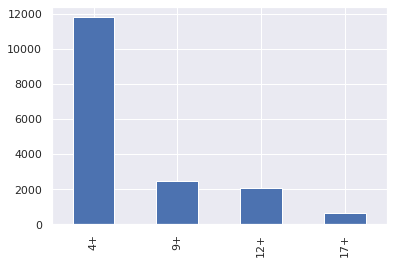

In [61]:
import seaborn as sns
sns.set()
df.age_rating.value_counts().plot(kind = 'bar')

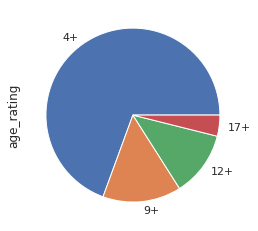

In [63]:
import seaborn as sns
sns.set()
_ = df.age_rating.value_counts().plot(kind = 'pie') # przypisanie znika napisy o bibliotece

In [66]:
df.price.value_counts()

0.00      14212
0.99       1078
1.99        515
2.99        471
4.99        237
3.99        163
9.99         88
11.99        59
5.99         42
6.99         32
179.99       30
7.99         17
8.99         13
19.99         9
14.99         4
12.99         3
16.99         2
29.99         2
139.99        1
99.99         1
37.99         1
36.99         1
18.99         1
59.99         1
Name: price, dtype: int64

In [67]:
df.average_user_rating.value_counts()

4.50    2861
4.00    1722
5.00     990
3.50     925
3.00     514
2.50     317
2.00     158
1.50      60
1.00      14
Name: average_user_rating, dtype: int64

In [69]:
df.languages.str.split(', ')

0        [DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, P...
1                                                     [EN]
2                                                     [EN]
3        [DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, P...
4        [DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, R...
                               ...                        
17002                                                 [EN]
17003                                                 [EN]
17004                                                 [EN]
17005                                                 [EN]
17006                                             [EN, ZH]
Name: languages, Length: 17007, dtype: object

In [70]:
df['num_lang'] = df.languages.str.split(', ').str.len() #kolumna informuje o ilości dostępnych języków dla aplikacji
df.head()

,id,name,average_user_rating,user_rating_count,price,developer,age_rating,languages,size,primary_genre,genres,original_release_date,current_version_release_date,num_lang
0,284921427,Sudoku,4.00,3553.00,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.00,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017,17.00
1,284926400,Reversi,3.50,284.00,1.99,Kiss The Machine,4+,EN,12328960.00,Games,"Games, Strategy, Board",11/07/2008,17/05/2018,1.00
2,284946595,Morocco,3.00,8376.00,0.00,Bayou Games,4+,EN,674816.00,Games,"Games, Board, Strategy",11/07/2008,5/09/2017,1.00
3,285755462,Sudoku (Free),3.50,190394.00,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.00,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017,17.00
4,285831220,Senet Deluxe,3.50,28.00,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.00,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018,15.00


In [71]:
df.num_lang.value_counts()

1.00      12566
2.00       1102
3.00        495
16.00       316
4.00        261
5.00        247
6.00        220
25.00       171
9.00        154
11.00       147
8.00        142
7.00        140
10.00       140
31.00       133
12.00        91
21.00        77
14.00        64
13.00        64
15.00        54
17.00        37
30.00        35
19.00        34
32.00        34
33.00        33
22.00        31
18.00        24
46.00        20
26.00        18
20.00        14
24.00        13
23.00        11
27.00        11
28.00         9
29.00         8
45.00         6
44.00         5
65.00         4
42.00         3
43.00         3
36.00         2
49.00         2
48.00         1
66.00         1
35.00         1
34.00         1
111.00        1
76.00         1
Name: num_lang, dtype: int64

In [72]:
df.average_user_rating.value_counts(dropna = False)

NaN     9446
4.50    2861
4.00    1722
5.00     990
3.50     925
3.00     514
2.50     317
2.00     158
1.50      60
1.00      14
Name: average_user_rating, dtype: int64

In [73]:
df.isnull().sum()

id                                 0
name                               0
average_user_rating             9446
user_rating_count               9446
price                             24
developer                          0
age_rating                         0
languages                         60
size                               1
primary_genre                      0
genres                             0
original_release_date              0
current_version_release_date       0
num_lang                          60
dtype: int64

In [74]:
df = df.dropna() # usuwa cały wiersz, w którym występuje jakiś Na
df.isnull().sum()

id                              0
name                            0
average_user_rating             0
user_rating_count               0
price                           0
developer                       0
age_rating                      0
languages                       0
size                            0
primary_genre                   0
genres                          0
original_release_date           0
current_version_release_date    0
num_lang                        0
dtype: int64

SQL

In [75]:
url = 'https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/online_retail.xlsx'
retail_raw = pd.read_excel(url)
retail_raw.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


In [76]:
retail = retail_raw.copy()
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [77]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [78]:
retail = retail.dropna()

In [80]:
retail[retail.Quantity >= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France


In [81]:
retail.CustomerID = retail.CustomerID.apply(lambda x: str(int(x))) # zmiana na typ tekstowy
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [82]:
# SELECT * FROM retail
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [83]:
# SELECT Quantity, UnitPrice, CustomerID FROM retail
retail[['Quantity', 'UnitPrice', 'CustomerID']]

,Quantity,UnitPrice,CustomerID
0,6,2.55,17850
1,6,3.39,17850
2,8,2.75,17850
3,6,3.39,17850
4,6,3.39,17850
...,...,...,...
541904,12,0.85,12680
541905,6,2.10,12680
541906,4,4.15,12680
541907,4,4.15,12680


In [84]:
# SELECT Quantity, UnitPrice, CustomerID FROM retail LIMIT 10
retail[['Quantity', 'UnitPrice', 'CustomerID']].head(10)

,Quantity,UnitPrice,CustomerID
0,6,2.55,17850
1,6,3.39,17850
2,8,2.75,17850
3,6,3.39,17850
4,6,3.39,17850
5,2,7.65,17850
6,6,4.25,17850
7,6,1.85,17850
8,6,1.85,17850
9,32,1.69,13047


In [85]:
# SELECT * FROM retail WHERE  CustomerID = '17850'
retail[retail.CustomerID == '17850']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
86898,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2011-02-10 14:38:00,4.95,17850,United Kingdom
86899,C543611,21874,GIN AND TONIC MUG,-1,2011-02-10 14:38:00,1.06,17850,United Kingdom
86900,C543611,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,-2,2011-02-10 14:38:00,2.75,17850,United Kingdom
86901,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2011-02-10 14:38:00,4.95,17850,United Kingdom


In [86]:
# SELECT * FROM retail WHERE  CustomerID = '17850' AND UnitPrice > 5
retail[(retail.CustomerID == '17850') & (retail.UnitPrice > 5)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
58,536373,82486,WOOD S/3 CABINET ANT WHITE FINISH,4,2010-12-01 09:02:00,6.95,17850,United Kingdom
63,536373,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 09:02:00,7.65,17850,United Kingdom
75,536375,82486,WOOD S/3 CABINET ANT WHITE FINISH,4,2010-12-01 09:32:00,6.95,17850,United Kingdom
80,536375,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 09:32:00,7.65,17850,United Kingdom
288,536396,82486,WOOD S/3 CABINET ANT WHITE FINISH,4,2010-12-01 10:51:00,6.95,17850,United Kingdom
293,536396,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 10:51:00,7.65,17850,United Kingdom
294,536396,22803,IVORY EMBROIDERED QUILT,2,2010-12-01 10:51:00,35.75,17850,United Kingdom
425,536406,82486,WOOD S/3 CABINET ANT WHITE FINISH,4,2010-12-01 11:33:00,6.95,17850,United Kingdom
430,536406,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 11:33:00,7.65,17850,United Kingdom


In [87]:
# SELECT * FROM retail WHERE  CustomerID = '17850' OR Country = 'France
retail[(retail.CustomerID == '17850') | (retail.Country == 'France')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [88]:
# SELECT * FROM retail WHERE InvoiceNo is notnull
retail[retail.InvoiceNo.notnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [89]:
# SELECT CustomerID, count(*) FROM retail GROUP BY CustomerID
retail.groupby('CustomerID').size()

CustomerID
12346      2
12347    182
12348     31
12349     73
12350     17
        ... 
18280     10
18281      7
18282     13
18283    756
18287     70
Length: 4372, dtype: int64

In [93]:
# SELECT CustomerID, avg(Revenue), count(*) FROM retail GROUP BY CustomerID
retail['Revenue'] = retail.Quantity * retail.UnitPrice
retail.groupby('CustomerID').aggregate({'Revenue': np.mean, 'CustomerID': np.size}). \
rename(columns={'Revenue': 'RevenueAvg'})

,RevenueAvg,CustomerID
CustomerID,,
12346,0.00,2
12347,23.68,182
12348,57.98,31
12349,24.08,73
12350,19.67,17
...,...,...
18280,18.06,10
18281,11.55,7
18282,13.58,13


In [95]:
# SELECT InvoiceDateDay, sum(Revenue) FROM retail GROUP BY InvoiceDateDay
retail['InvoiceDateDay'] = retail.InvoiceDate.dt.day
results = retail.groupby('InvoiceDateDay').aggregate({'Revenue': np.sum}). \
rename(columns={'Revenue': 'RevenueSum'})

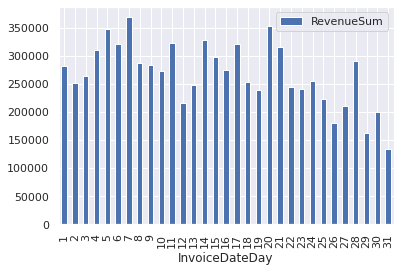

In [96]:
results.plot(kind = 'bar')

In [97]:
# ORDER BY Quantity DESC LIMIT 5
retail.nlargest(5, columns = 'Quantity')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceDateDay
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.60,9
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.60,18
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256,United Kingdom,0.00,25
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901,United Kingdom,1008.00,27
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135,United Kingdom,3096.00,27


In [98]:
# ORDER BY Quantity LIMIT 5
retail.nsmallest(5, columns = 'Quantity')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceDateDay
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom,-168469.60,9
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,-77183.60,18
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838,United Kingdom,-280.80,2
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749,United Kingdom,-6539.40,18
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749,United Kingdom,-3700.00,18
